In [1]:
import time
import keras_cv
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os.path
import numpy as np
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'


2022-11-22 16:25:10.378887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 16:25:10.574283: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 16:25:10.664655: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 16:25:11.440946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
keras.mixed_precision.set_global_policy("mixed_float16")
model = keras_cv.models.StableDiffusion(img_height=512, img_width=512)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3080 Laptop GPU, compute capability 8.6


2022-11-22 16:25:14.386076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 16:25:14.414682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 16:25:14.414865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 16:25:14.415429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 16:25:14.503570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow bin

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [3]:
def figname_gen(title):
    figname = f'{title}'
    if os.path.isfile(f'Figures/{figname}.png'): 
        num = str(np.random.randint(1000000, 9999999))
        figname = figname + '_' + num
    return figname

def plot_images(images, title):
    fig = plt.figure(figsize=(5, 5))
    plt.margins(0,0)
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    fig.suptitle(title, y=0.95, fontsize='xx-large', fontweight='bold')
    figname = figname_gen(title)
    fig.savefig(f'Figures/{figname}.png', bbox_inches='tight')
    np.save(f'Arrays/{figname}.png', images)
        
def inference(prompt, **kwargs):
    images = model.text_to_image(prompt, **kwargs)
    plot_images(images, title=prompt)

2022-11-22 16:25:40.749794: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-22 16:25:41.915698: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 16:25:41.926499: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 16:25:41.926551: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-22 16:25:41.936959: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 16:25:41.937162: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


25/25 [==============================] - 16s 356ms/step


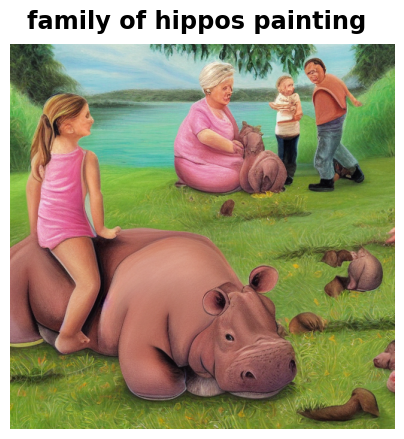

In [4]:
inference("family of hippos painting", batch_size=1, seed=42)

25/25 [==============================] - 9s 354ms/step


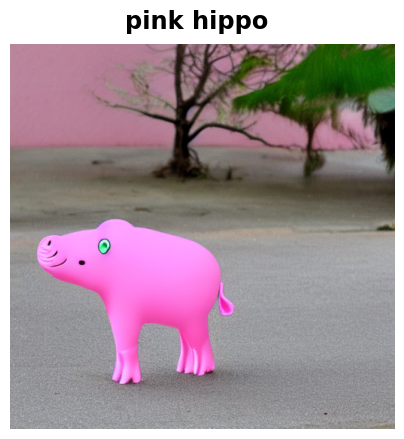

In [5]:
inference("pink hippo", batch_size=1, seed=42)